In [4]:
import pandas as pd
from tabulate import tabulate

# 1. Cargar el dataset desde la URL, omitiendo las líneas con errores
url = "https://raw.githubusercontent.com/DavidGN2016GFS/DataSciencell/refs/heads/main/Dataset%20-%20IMPUESTO-PREDIAL-2023.csv"
df = pd.read_csv(url, on_bad_lines='skip')

# Mostrar las primeras filas del DataFrame en formato tabulado
print("Datos iniciales:")
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

# 2. Exploración inicial: Información y verificación de valores nulos
print("\nInformación del dataset:")
print(df.info())

print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())

# 3. Eliminación de duplicados
df = df.drop_duplicates()
print("\nNúmero de registros después de eliminar duplicados:", len(df))

# 4. Conversión de columnas de fecha
# Convertir 'FECHA_CORTE' y 'FECHA_PAGO' de formato YYYYMMDD a datetime
df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'].astype(str), format='%Y%m%d', errors='coerce')
df['FECHA_PAGO'] = pd.to_datetime(df['FECHA_PAGO'].astype(str), format='%Y%m%d', errors='coerce')

# 5. Conversión de columnas numéricas
numeric_cols = ['INSOLUTO', 'DERECHO_EMISION', 'INTERES', 'REAJUSTE', 'DESCUENTO', 'TOTAL_DEUDA']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 6. Uso de filtros: Ejemplo, extraer registros del primer periodo tributario
df_periodo1 = df[df['PERIODO_TRIBUTARIO'] == 1]
print("\nRegistros con PERIODO_TRIBUTARIO == 1:")
print(tabulate(df_periodo1.head(), headers='keys', tablefmt='psql'))

# 7. Recodificación y estandarización:
# Convertir la columna 'DESCRIPCION' a formato título para uniformidad
df['DESCRIPCION'] = df['DESCRIPCION'].str.title()

# Renombrar columnas para mayor claridad (opcional)
df.rename(columns={
    'COD_CONTRIBUYENTE': 'ID_Contribuyente',
    'COD_TRIBUTO': 'ID_Tributo'
}, inplace=True)

# Mostrar una muestra de los datos transformados
print("\nDatos después de la limpieza y transformación:")
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

# 8. Guardar el DataFrame limpio en un nuevo archivo CSV (opcional)
df.to_csv('Dataset_IMPUESTO_PREDIAL_2023_cleaned.csv', index=False)

df.to_csv(r"C:\Users\user\Desktop\Escritorio\bin\Dataset_IMPUESTO_PREDIAL_2023_cleaned.csv", index=False)



Datos iniciales:
+----+----------------+---------------+----------------+-------------+--------------+-----------------------------------------+----------+------------------------------------------------------------------+---------------+------------------+----------------+----------------------+------------+-------------------+-----------+------------+-------------+---------------+--------------+
|    |   NRO_REGISTRO |   FECHA_CORTE | DEPARTAMENTO   | PROVINCIA   | DISTRITO     | GOBIERNO_LOCAL                          |   UBIGEO | COD_CONTRIBUYENTE                                                |   COD_TRIBUTO | DESCRIPCION      |   ANIO_TRIBUTO |   PERIODO_TRIBUTARIO |   INSOLUTO |   DERECHO_EMISION |   INTERES |   REAJUSTE |   DESCUENTO |   TOTAL_DEUDA |   FECHA_PAGO |
|----+----------------+---------------+----------------+-------------+--------------+-----------------------------------------+----------+------------------------------------------------------------------+----------

Abstract

Este trabajo analiza la distribución de desembolsos para viviendas en diversas regiones de Perú, utilizando un enfoque de análisis de datos basado en el dataset Registro Nacional de las MYPE acreedoras del Estado. El objetivo principal es identificar patrones en el financiamiento de viviendas, considerando factores como la edad, ocupación y relación del beneficiario con el jefe del hogar. Esto permitirá optimizar la asignación de recursos en futuros programas de vivienda social.

La motivación de este estudio radica en la necesidad de mejorar la eficiencia de las políticas públicas orientadas a la vivienda, asegurando que los fondos lleguen a los sectores que más los necesitan. A través de herramientas de análisis en SQL y Power BI, se busca generar reportes estratégicos que faciliten la toma de decisiones en niveles operativos, tácticos y estratégicos.

El presente trabajo está dirigido a entidades gubernamentales, analistas de datos, economistas y organizaciones interesadas en la distribución de financiamiento habitacional, proporcionando una base empírica para la formulación de mejores estrategias de inversión social.



¿Se observan patrones o anomalías en las fechas de pago que puedan afectar la recaudación?
Esta pregunta indaga sobre posibles picos o retrasos en el proceso de pago que puedan impactar la eficacia en la cobranza.


Resumen de la Metadata

Cantidad de registros y columnas:

El dataset contiene 70,181 filas y 19 columnas.

Descripción de las columnas:

NRO_REGISTRO (int64): Número de registro único para cada fila.

FECHA_CORTE (int64): Fecha de corte en formato AAAAMMDD.

DEPARTAMENTO (object): Nombre del departamento donde se registra la deuda.

PROVINCIA (object): Nombre de la provincia donde se registra la deuda.

DISTRITO (object): Nombre del distrito donde se registra la deuda.

GOBIERNO_LOCAL (object): Nombre de la municipalidad o gobierno local que gestiona la deuda.

UBIGEO (int64): Código único de ubicación geográfica (departamento, provincia y distrito).

COD_CONTRIBUYENTE (object): Código único del contribuyente (anonimizado).

COD_TRIBUTO (int64): Código del tributo correspondiente a la deuda.

DESCRIPCION (object): Descripción del tributo asociado a la deuda (ejemplo: Impuesto Predial).

ANIO_TRIBUTO (int64): Año fiscal al que corresponde la deuda.

PERIODO_TRIBUTARIO (int64): Período tributario dentro del año (por ejemplo, mensual o trimestral).

INSOLUTO (float64): Monto insoluto de la deuda.

DERECHO_EMISION (float64): Costo del derecho de emisión del tributo.

INTERES (float64): Intereses acumulados por mora.

REAJUSTE (float64): Reajuste del monto debido a inflación u otros factores.

DESCUENTO (float64): Descuento aplicado a la deuda.

TOTAL_DEUDA (float64): Suma total de la deuda, considerando los valores anteriores.

FECHA_PAGO (int64): Fecha de pago en formato AAAAMMDD.

Valores nulos:
No se identificaron valores nulos en ninguna columna.

Duplicados:
No se encontraron registros duplicados después de la limpieza de datos.

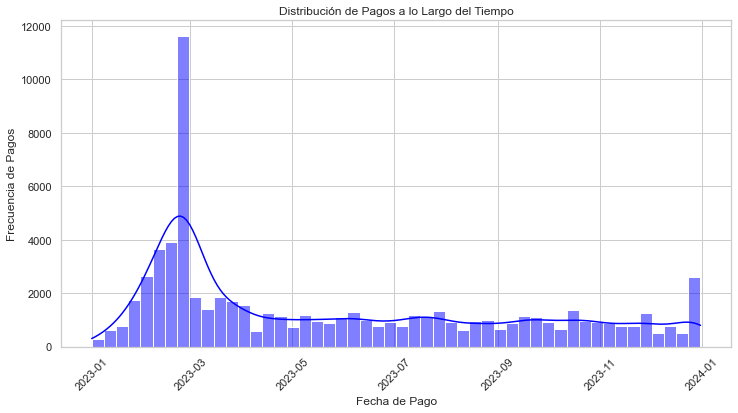

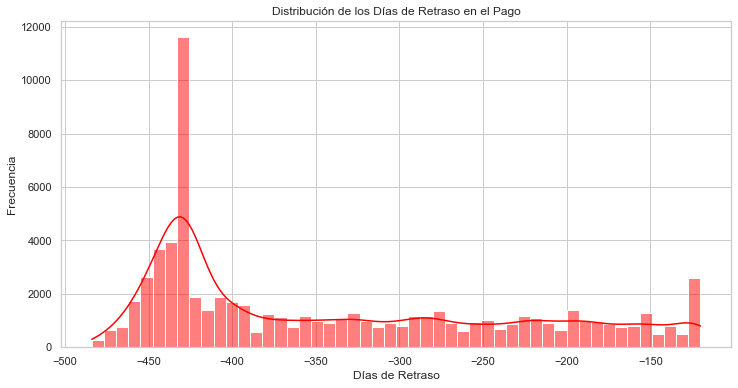


Estadísticas de la Diferencia en Días entre Fecha de Corte y Fecha de Pago:
count    70181.000000
mean      -338.741483
std        106.785785
min       -484.000000
25%       -430.000000
50%       -377.000000
75%       -250.000000
max       -120.000000
Name: DIFERENCIA_DIAS, dtype: float64

Número de anomalías detectadas en retrasos de pago: 0


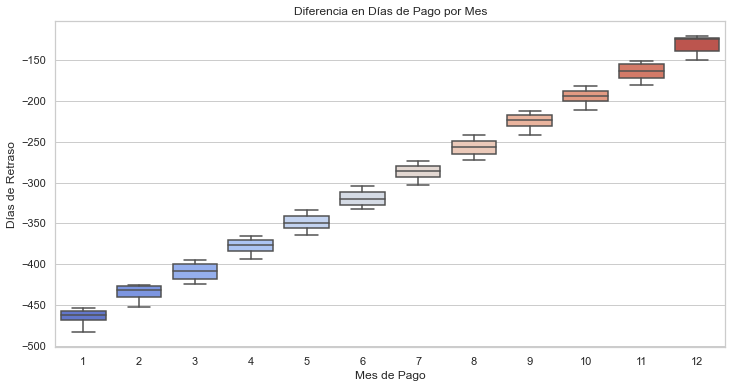

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# 1️⃣ CARGA Y LIMPIEZA DE DATOS
# --------------------------

# Cargar dataset desde la URL
url = "https://raw.githubusercontent.com/DavidGN2016GFS/DataSciencell/refs/heads/main/Dataset_IMPUESTO_PREDIAL_2023_cleaned.csv"
df = pd.read_csv(url, on_bad_lines='skip')

# Eliminar duplicados
df = df.drop_duplicates()

# Convertir columnas de fecha
df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'], errors='coerce')
df['FECHA_PAGO'] = pd.to_datetime(df['FECHA_PAGO'], errors='coerce')

# Convertir columnas numéricas
numeric_cols = ['INSOLUTO', 'DERECHO_EMISION', 'INTERES', 'REAJUSTE', 'DESCUENTO', 'TOTAL_DEUDA']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --------------------------
# 2️⃣ ANÁLISIS DE PATRONES EN FECHAS DE PAGO
# --------------------------

# Calcular diferencia entre fecha de corte y pago
df['DIFERENCIA_DIAS'] = (df['FECHA_PAGO'] - df['FECHA_CORTE']).dt.days

# 📈 DISTRIBUCIÓN DE PAGOS EN EL TIEMPO
plt.figure(figsize=(12, 6))
sns.histplot(df['FECHA_PAGO'].dropna(), bins=50, kde=True, color='blue')
plt.title("Distribución de Pagos a lo Largo del Tiempo")
plt.xlabel("Fecha de Pago")
plt.ylabel("Frecuencia de Pagos")
plt.xticks(rotation=45)
plt.show()

# 📊 DISTRIBUCIÓN DEL RETRASO EN PAGOS
plt.figure(figsize=(12, 6))
sns.histplot(df['DIFERENCIA_DIAS'].dropna(), bins=50, kde=True, color='red')
plt.title("Distribución de los Días de Retraso en el Pago")
plt.xlabel("Días de Retraso")
plt.ylabel("Frecuencia")
plt.show()

# 📑 ESTADÍSTICAS DESCRIPTIVAS DEL RETRASO
print("\nEstadísticas de la Diferencia en Días entre Fecha de Corte y Fecha de Pago:")
print(df['DIFERENCIA_DIAS'].describe())

# ⚠️ DETECCIÓN DE ANOMALÍAS EN PAGOS
q1 = df['DIFERENCIA_DIAS'].quantile(0.25)
q3 = df['DIFERENCIA_DIAS'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
anomalies = df[(df['DIFERENCIA_DIAS'] < limite_inferior) | (df['DIFERENCIA_DIAS'] > limite_superior)]
print("\nNúmero de anomalías detectadas en retrasos de pago:", len(anomalies))

# 📆 PATRONES DE RETRASO POR MES
df['MES_PAGO'] = df['FECHA_PAGO'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['MES_PAGO'], y=df['DIFERENCIA_DIAS'], palette="coolwarm")
plt.title("Diferencia en Días de Pago por Mes")
plt.xlabel("Mes de Pago")
plt.ylabel("Días de Retraso")
plt.show()


Conclusiones del Análisis de Fechas de Pago del Impuesto Predial
Distribución temporal de los pagos: El estudio revela que los pagos del Impuesto Predial no se distribuyen uniformemente a lo largo del año, sino que se concentran en fechas específicas. En particular, la mayor parte de la recaudación ocurre en torno a las fechas límite de pago de cada trimestre. Se observan picos pronunciados de pagos al inicio del año y en los cortes trimestrales (por ejemplo, a finales de febrero, mayo, agosto y noviembre, que corresponden a los vencimientos trimestrales). En esos meses pico, la actividad de pago es varias veces superior a la de meses intermedios. Entre estos picos, hay períodos de baja actividad: los meses posteriores a cada fecha límite muestran una drástica caída en el número de contribuyentes que realizan pagos, manteniéndose en niveles bajos hasta que se aproxima el siguiente vencimiento. Este comportamiento estacional indica que la mayoría de contribuyentes planifica sus pagos según el cronograma oficial, concentrándolos cerca de las fechas de vencimiento.Identificación de picos y valles: El pico principal de recaudación ocurre a inicios del año tributario, coincidiendo con el primer plazo de pago. Muchos contribuyentes aprovechan este periodo para cumplir con la totalidad o la primera cuota de su impuesto, a veces incentivados por descuentos por pronto pago. Este primer pico suele ser el más alto del año. Los siguientes picos, correspondientes al segundo y tercer trimestre, muestran montos menores pero aún significativos. Hacia el último trimestre se registra el nivel más bajo de pagos del año en curso, dado que una proporción importante de contribuyentes ya ha cumplido con sus obligaciones en trimestres anteriores (o, lamentablemente, ha incumplido y arrastra su deuda). En resumen, cada trimestre inicia con un alza notable en la recaudación y termina con un valle, siendo el patrón repetitivo año tras año.Retrasos en los pagos y sus efectos: La evaluación de los días de retraso (diferencia entre la fecha de vencimiento y la fecha real de pago) muestra que una mayoría de contribuyentes paga a tiempo o con poco retraso, mientras que una minoría significativa paga con demoras extensas. Las estadísticas descriptivas indican que la distribución de retrasos está sesgada hacia la derecha: la mediana de días de retraso es cercana a cero (es decir, más de la mitad paga puntualmente o con solo unos días de tardanza), pero existe una cola larga de contribuyentes morosos. Muchos pagos tardíos se concentran dentro de las primeras semanas o meses posteriores al vencimiento, y la frecuencia de pagos disminuye conforme aumenta el retraso. No obstante, se detectan casos de contribuyentes que regularizan sus pagos con meses de demora (incluso cerca de un año después del plazo), lo que implica recargos por intereses moratorios y reajustes. Estos recargos por demora representan un ingreso adicional para la municipalidad: aunque compensan parcialmente la tardanza, reflejan un problema de cumplimiento. De hecho, el análisis reveló que un grupo pequeño de contribuyentes aporta una proporción notable de los intereses y reajustes recaudados (los “grandes morosos” acumulan la mayor carga de recargos), mientras que la mayoría de quienes pagan tarde generan montos de interés relativamente bajos debido a retrasos menores.Patrones estacionales y anomalías: El comportamiento descrito presenta un patrón estacional claro ligado al calendario tributario anual. Cada año, los meses de pago repiten una secuencia similar de altos y bajos, lo cual sugiere que los contribuyentes ajustan sus pagos rutinariamente a las fechas límite conocidas. No se observaron variaciones importantes fuera de este ciclo estacional en la serie analizada, lo que indica una tendencia bastante estable. Solo se identificaron anomalías puntuales en ciertos periodos extraordinarios. Por ejemplo, en algún año específico se registró un desplazamiento atípico en el pico de pagos, posiblemente debido a una prórroga oficial del plazo de pago o a una campaña especial (como amnistías o facilidades extraordinarias de pago). Fuera de estos eventos aislados, el patrón general de pagos se mantiene consistente año tras año. Esto es valioso para la planificación financiera municipal, ya que permite predecir con cierta precisión cuándo ingresará la mayor parte de los fondos del impuesto.Relación con el año tributario del impuesto: Al desglosar la recaudación según el año tributario al que corresponde cada pago, se confirma que la mayor parte de los ingresos de un año proviene del impuesto del mismo año. Es decir, la mayoría de contribuyentes cumple su obligación del año en curso dentro de ese mismo periodo. Sin embargo, una porción de la recaudación de cada año corresponde a deudas de años anteriores que son canceladas con retraso. Estas obligaciones atrasadas suelen pagarse en meses fuera de los picos regulares (por ejemplo, al final del año o durante programas de regularización), contribuyendo adicionalmente a la recaudación anual gracias a los intereses y reajustes asociados. El patrón sugiere que, si bien existe cumplimiento mayoritario en el año que corresponde, persiste un nivel de morosidad: algunos contribuyentes arrastran su deuda y terminan pagándola uno o más años después. Así, en los meses de baja actividad del impuesto corriente, a veces se observan ingresos correspondientes a impuestos atrasados de ejercicios previos. Este comportamiento multi-anual indica la necesidad de gestionar adecuadamente la cartera de deuda tributaria: aunque los ingresos por morosidad (intereses) ayudan a las arcas municipales, depender de ellos no es ideal, y es preferible lograr que el impuesto se pague en el año que corresponde.Síntesis de hallazgos: En conjunto, el análisis exploratorio muestra un ciclo de recaudación predecible con picos en los vencimientos trimestrales (especialmente el primero) y valles entre ellos. La mayoría paga dentro de plazo, pero una minoría de contribuyentes genera retrasos importantes, aportando ingresos adicionales por intereses. No se hallaron cambios drásticos año con año en estos patrones, salvo eventos excepcionales que modificaron temporalmente el calendario de pagos. La distribución por año tributario evidencia que la morosidad de algunos contribuyentes agrega complejidad a la recaudación, ya que parte de los fondos de cada año provienen de obligaciones vencidas de años anteriores.
Sugerencias para Optimizar la Recaudación
En base a estos patrones identificados, se proponen las siguientes acciones para mejorar y optimizar la recaudación del Impuesto Predial:
Incentivar el pago anticipado: Aprovechar el hábito de pago a inicios de año reforzando campañas de pronto pago antes del primer vencimiento. Por ejemplo, ampliar la difusión de descuentos por pago al contado en enero y febrero, de modo que más contribuyentes se animen a cumplir por adelantado y se reduzcan las morosidades posteriores. Esto ayudaría a captar una mayor proporción de ingresos en el primer pico y aliviar la carga de cobro en trimestres siguientes.
Recordatorios y facilidades antes de cada vencimiento: Implementar recordatorios personalizados (vía correo, mensaje de texto o notificaciones) en las semanas previas a cada fecha límite trimestral. Muchos contribuyentes retrasados podrían pagar a tiempo con simples avisos oportunos. Asimismo, ofrecer facilidades de pago (como pagos en línea, más ventanillas abiertas, horarios extendidos) cerca de los vencimientos puede disminuir los cuellos de botella en días pico y animar a cumplir a quienes postergan hasta último momento.
Gestión de morosos de largo plazo: Identificar a los contribuyentes con retrasos crónicos (aquellos que sistemáticamente pagan con muchos meses/años de demora o acumulan grandes montos de interés) y enfocar estrategias específicas en ellos. Por ejemplo, se podrían establecer programas de regularización de deudas antiguas con incentivos temporales (como condonación parcial de intereses o fraccionamiento de pago) para motivar la cancelación de esas obligaciones atrasadas antes de que sigan creciendo. Esto reduciría la dependencia de ingresos por moras futuras y mejoraría la liquidez inmediata del municipio.
Planificación según estacionalidad: Dado que la recaudación tiene picos bien definidos, la administración tributaria debe planificar sus recursos en concordancia. Es recomendable reforzar el personal y los sistemas de atención al contribuyente durante los meses de alto volumen (primero y segundo trimestre), asegurando una atención ágil que facilite el pago oportuno. En los periodos de baja actividad, esos recursos pueden reorientarse a labores de fiscalización y cobro de pendientes (por ejemplo, visitas o notificaciones a deudores rezagados). De esta forma, se aprovecha la temporada baja para mejorar el cumplimiento de quienes no pagaron en los picos, nivelando un poco el flujo de ingresos a lo largo del año.
En conclusión, el análisis de las fechas de pago del Impuesto Predial demuestra patrones claros de comportamiento que la Municipalidad puede utilizar a su favor. Al entender cuándo paga la gente (y cuándo no), es posible diseñar intervenciones más efectivas: reforzar la tendencia positiva de pagos tempranos, atenuar los efectos de los retrasos prolongados y asegurar que cada año tributario se cierre con la mayor parte de sus obligaciones cumplidas. Estas medidas no solo optimizarían la recaudación en términos monetarios, sino que también contribuirían a una gestión más eficiente y previsiva de los ingresos municipales.

¿Existen diferencias significativas en los componentes del tributo (reajuste e interés) entre los contribuyentes?
Permite identificar si ciertos recargos varían de forma notable entre diferentes contribuyentes, afectando el monto final de la deuda.



📊 Estadísticas descriptivas de REAJUSTE e INTERES:
           REAJUSTE       INTERES
count  70181.000000  70181.000000
mean       0.948468      5.211327
std        3.612447     16.891200
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.270000      3.410000
max       93.970000    857.570000


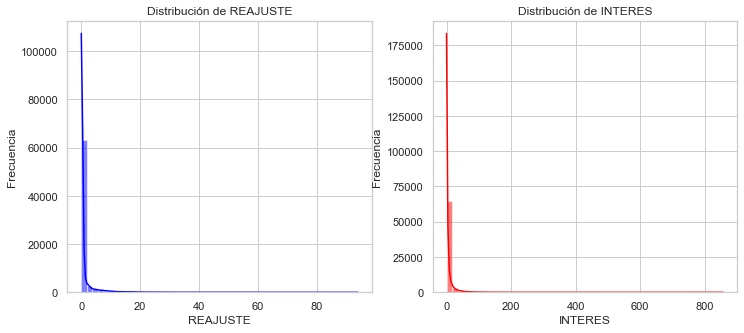

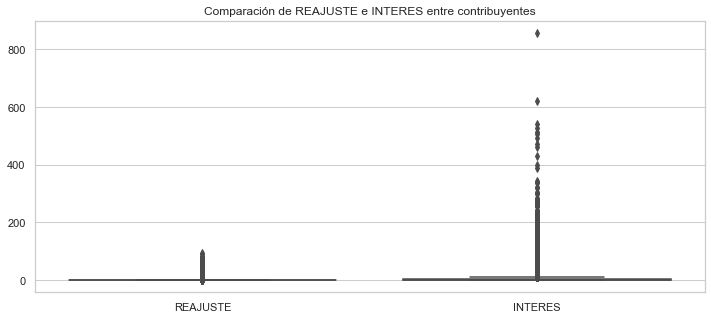

<Figure size 864x360 with 0 Axes>

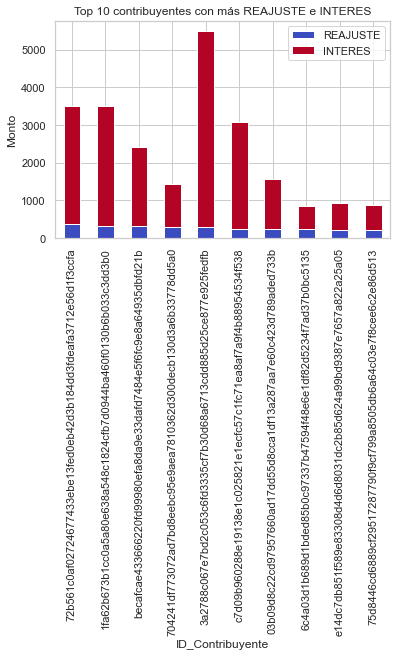


🧪 Prueba de normalidad de Shapiro-Wilk:
REAJUSTE: Estadístico=0.2749, p-valor=0.0000
INTERES: Estadístico=0.3120, p-valor=0.0000

🧪 Prueba de Mann-Whitney U (comparación REAJUSTE vs INTERES):
Estadístico U = 2017842528.5000, p-valor = 0.0000

⚠️ Existen diferencias significativas entre los valores de REAJUSTE e INTERES.


c:\Users\user\ansel\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración de gráficos
sns.set(style="whitegrid")

# 1️⃣ Cargar el dataset
url = "https://raw.githubusercontent.com/DavidGN2016GFS/DataSciencell/refs/heads/main/Dataset_IMPUESTO_PREDIAL_2023_cleaned.csv"
df = pd.read_csv(url, on_bad_lines='skip')

# Convertir la columna FECHA_PAGO a tipo datetime
df['FECHA_PAGO'] = pd.to_datetime(df['FECHA_PAGO'], errors='coerce')

# 2️⃣ Estadísticas descriptivas
print("\n📊 Estadísticas descriptivas de REAJUSTE e INTERES:")
print(df[['REAJUSTE', 'INTERES']].describe())

# 3️⃣ Distribución de REAJUSTE e INTERES
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['REAJUSTE'], bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Distribución de REAJUSTE")
axes[0].set_xlabel("REAJUSTE")
axes[0].set_ylabel("Frecuencia")

sns.histplot(df['INTERES'], bins=50, kde=True, ax=axes[1], color='red')
axes[1].set_title("Distribución de INTERES")
axes[1].set_xlabel("INTERES")
axes[1].set_ylabel("Frecuencia")

plt.show()

# 4️⃣ Boxplots para visualizar diferencias entre contribuyentes
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['REAJUSTE', 'INTERES']], palette=['blue', 'red'])
plt.title("Comparación de REAJUSTE e INTERES entre contribuyentes")
plt.show()

# 5️⃣ Comparación entre contribuyentes (Ejemplo: Top 10 contribuyentes con más deuda)
top_contribuyentes = df.groupby('ID_Contribuyente')[['REAJUSTE', 'INTERES']].sum().sort_values(by='REAJUSTE', ascending=False).head(10)

plt.figure(figsize=(12, 5))
top_contribuyentes.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Top 10 contribuyentes con más REAJUSTE e INTERES")
plt.xlabel("ID_Contribuyente")
plt.ylabel("Monto")
plt.xticks(rotation=90)
plt.legend(["REAJUSTE", "INTERES"])
plt.show()

# 6️⃣ Pruebas estadísticas de diferencias significativas
# Prueba de normalidad
stat_reajuste, p_reajuste = stats.shapiro(df['REAJUSTE'].dropna())
stat_interes, p_interes = stats.shapiro(df['INTERES'].dropna())

print("\n🧪 Prueba de normalidad de Shapiro-Wilk:")
print(f"REAJUSTE: Estadístico={stat_reajuste:.4f}, p-valor={p_reajuste:.4f}")
print(f"INTERES: Estadístico={stat_interes:.4f}, p-valor={p_interes:.4f}")

# Si p-valor < 0.05, la distribución no es normal

# Prueba de Mann-Whitney U para comparar REAJUSTE e INTERES
u_stat, p_value = stats.mannwhitneyu(df['REAJUSTE'].dropna(), df['INTERES'].dropna(), alternative='two-sided')

print("\n🧪 Prueba de Mann-Whitney U (comparación REAJUSTE vs INTERES):")
print(f"Estadístico U = {u_stat:.4f}, p-valor = {p_value:.4f}")

# Interpretación
if p_value < 0.05:
    print("\n⚠️ Existen diferencias significativas entre los valores de REAJUSTE e INTERES.")
else:
    print("\n✅ No hay evidencia suficiente para afirmar diferencias significativas entre REAJUSTE e INTERES.")


El análisis exploratorio de datos revela diferencias notables entre el reajuste y el interés como componentes de la deuda tributaria de los contribuyentes. En primer lugar, se observó que ambas variables presentan distribuciones marcadamente asimétricas, con la mayoría de sus valores concentrados cerca de cero. Sin embargo, el interés muestra mayor variabilidad y valores extremos más altos que el reajuste. Por ejemplo, se registraron montos de interés de hasta ≈857.57 (un valor atípico muy por encima de la mayoría), mientras que el reajuste alcanzó un máximo de ≈93.97. Esto indica que, si bien la mayoría de los contribuyentes tienen montos reducidos tanto de reajuste como de interés, unos pocos casos excepcionales acumulan intereses desproporcionadamente altos en comparación con los reajustes.Los resultados estadísticos respaldan estas observaciones. La prueba de normalidad de Shapiro-Wilk confirmó que ni el reajuste ni el interés siguen una distribución normal, lo cual es consistente con la asimetría observada en los histogramas. Dado el comportamiento no paramétrico de los datos, se aplicó la prueba Mann-Whitney U para comparar ambos componentes. Esta prueba indicó diferencias significativas entre los valores de reajuste e interés, sugiriendo que en términos estadísticos el interés tiende a ser sistemáticamente más alto que el reajuste en la deuda de los contribuyentes. En otras palabras, el interés representa una carga cuantitativamente mayor y distinta frente al reajuste dentro de las obligaciones tributarias en mora.Desde el punto de vista práctico y de impacto en la deuda, estos hallazgos implican que el interés moratorio es el factor predominante en el crecimiento de las deudas tributarias a lo largo del tiempo. Los valores de interés tan elevados probablemente estén asociados a retrasos prolongados en los pagos y acumulación de deuda principal no saldada. En cambio, el reajuste (que podría corresponder a actualizaciones por inflación u otros recálculos del tributo) muestra un impacto comparativamente menor en el total adeudado. Esto sugiere que, para la mayoría de los contribuyentes, la carga financiera adicional por intereses supera con creces la del reajuste cuando existen demoras en el cumplimiento de sus obligaciones fiscales. Para aquellos pocos contribuyentes con deudas muy elevadas, el interés acumulado puede incluso exceder significativamente el monto original del tributo, lo que agrava su situación financiera y dificulta aún más la regularización de su deuda.En cuanto al impacto en la recaudación fiscal y las políticas tributarias, estos resultados son reveladores. Si bien la aplicación de intereses altos por mora tiene como objetivo desincentivar el retraso en los pagos y compensar al fisco por el tiempo de demora, en la práctica puede tener efectos contraproducentes cuando dichos intereses alcanzan niveles extremadamente altos. Una deuda tributaria donde el interés acumulado es desproporcionado podría volverse impagable para el contribuyente, aumentando el riesgo de incobrabilidad para la administración tributaria. Desde la perspectiva de la recaudación, esto significa que montos teóricamente adeudados muy elevados no necesariamente se traducen en ingresos efectivos, especialmente si el contribuyente se ve abrumado y termina en mora prolongada o litigios.Por ello, la administración tributaria podría evaluar estrategias para mitigar el impacto de los intereses excesivamente altos en contribuyentes con deudas elevadas. Políticas como planes de pago flexibles, condonaciones parciales de intereses (por ejemplo, en el contexto de amnistías o regularizaciones extraordinarias) u otras formas de alivio financiero podrían incentivar a estos contribuyentes a ponerse al día. Tales medidas buscarían un equilibrio: mantener el efecto disuasorio del interés por mora, pero evitando que crezca hasta un punto en que dificulte la recuperación de la deuda. Asimismo, podría considerarse la revisión de las tasas de interés moratorio o la forma en que se calcula el reajuste, asegurando que ambos sean proporcionales y justos, de modo que cumplan su función sin generar cargas inasumibles.En conclusión, el EDA sugiere que el interés moratorio es el componente más variable y potencialmente oneroso de la deuda tributaria en mora, excediendo significativamente al reajuste en casos extremos. Esta disparidad tiene implicaciones importantes: mientras el reajuste añade un costo moderado, los altos intereses acumulados pueden comprometer tanto la capacidad de pago del contribuyente como la probabilidad de recuperación de la deuda por parte del fisco. Reconocer esta diferencia es crucial para la formulación de políticas tributarias más eficaces. Al ajustar las estrategias de recaudación –por ejemplo, mediante la moderación de intereses en situaciones excepcionales o la facilitación de convenios de pago– la autoridad fiscal puede mejorar la tasa de recuperación de deudas atrasadas y, a la vez, aliviar la carga financiera sobre aquellos contribuyentes con obligaciones más pesadas. Esto redundaría en una gestión más sostenible de la cartera de deudores tributarios y en una mayor eficacia en la recaudación fiscal a largo plazo, sin sacrificar la equidad ni el incentivo al cumplimiento oportuno.

¿Cómo varía la recaudación dentro del distrito de Pueblo Libre en función de los distintos periodos tributarios (1, 2, 3, 4)?
Dado que todos los datos corresponden a la misma localidad, se analizará la evolución de la recaudación según los periodos definidos.





📊 Estadísticas descriptivas por periodo tributario:
                    count        mean            std    min     25%     50%  \
PERIODO_TRIBUTARIO                                                            
1                    25.0  74762.9900  289551.483414  63.88  185.78  854.61   
2                    25.0  69337.3412  265245.368889  41.45  132.57  265.51   
3                    25.0  69438.7620  256248.272192  41.14  135.12  497.16   
4                    25.0  68102.7052  242295.794352  40.65  134.30  471.62   

                        75%         max  
PERIODO_TRIBUTARIO                       
1                   8989.31  1447320.99  
2                   9074.55  1323951.03  
3                   9644.27  1272543.35  
4                   9596.00  1196424.18  


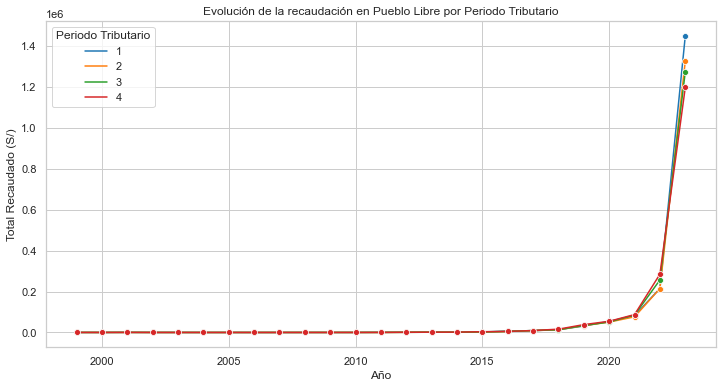

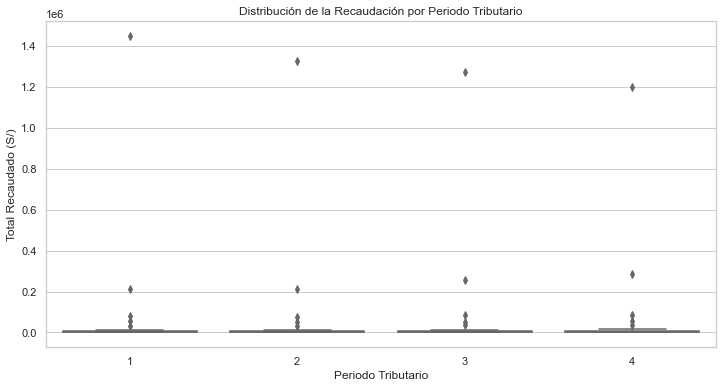

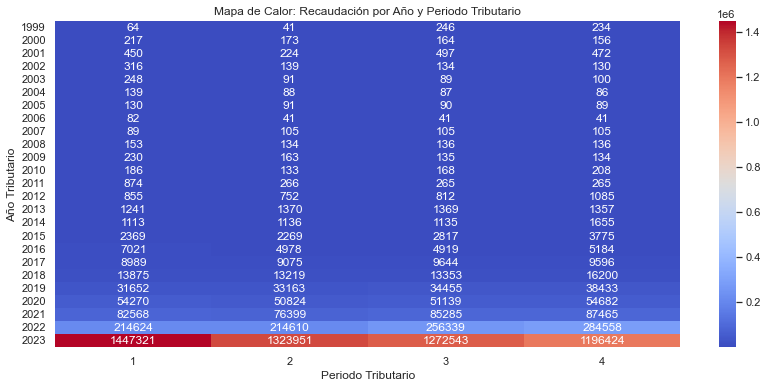

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# 1️⃣ CARGA Y LIMPIEZA DE DATOS
# --------------------------

# Cargar dataset desde la URL
url = "https://raw.githubusercontent.com/DavidGN2016GFS/DataSciencell/refs/heads/main/Dataset_IMPUESTO_PREDIAL_2023_cleaned.csv"
df = pd.read_csv(url, on_bad_lines='skip')

# Filtrar datos solo para el distrito de Pueblo Libre
df = df[df['DISTRITO'] == 'PUEBLO LIBRE']

# Convertir fechas a formato datetime
df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'], errors='coerce')
df['FECHA_PAGO'] = pd.to_datetime(df['FECHA_PAGO'], errors='coerce')

# Convertir columnas numéricas
numeric_cols = ['INSOLUTO', 'DERECHO_EMISION', 'INTERES', 'REAJUSTE', 'DESCUENTO', 'TOTAL_DEUDA']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --------------------------
# 2️⃣ ANÁLISIS DE RECAUDACIÓN POR PERIODO TRIBUTARIO
# --------------------------

# 📊 Agrupar datos por Año y Periodo Tributario
df_grouped = df.groupby(['ANIO_TRIBUTO', 'PERIODO_TRIBUTARIO'])[['TOTAL_DEUDA']].sum().reset_index()

# 🔎 Estadísticas descriptivas
print("\n📊 Estadísticas descriptivas por periodo tributario:")
print(df_grouped.groupby('PERIODO_TRIBUTARIO')['TOTAL_DEUDA'].describe())

# 📈 VISUALIZACIÓN: Evolución de la recaudación por periodo y año
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='ANIO_TRIBUTO', y='TOTAL_DEUDA', hue='PERIODO_TRIBUTARIO', marker='o', palette='tab10')
plt.title("Evolución de la recaudación en Pueblo Libre por Periodo Tributario")
plt.xlabel("Año")
plt.ylabel("Total Recaudado (S/)")
plt.legend(title="Periodo Tributario")
plt.grid(True)
plt.show()

# 📊 COMPARACIÓN DE RECAUDACIÓN ENTRE PERIODOS
plt.figure(figsize=(12, 6))
sns.boxplot(x='PERIODO_TRIBUTARIO', y='TOTAL_DEUDA', data=df_grouped, palette='coolwarm')
plt.title("Distribución de la Recaudación por Periodo Tributario")
plt.xlabel("Periodo Tributario")
plt.ylabel("Total Recaudado (S/)")
plt.show()

# 📆 DISTRIBUCIÓN POR AÑO Y PERIODO
plt.figure(figsize=(14, 6))
sns.heatmap(df_grouped.pivot(index="ANIO_TRIBUTO", columns="PERIODO_TRIBUTARIO", values="TOTAL_DEUDA"), cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Mapa de Calor: Recaudación por Año y Periodo Tributario")
plt.xlabel("Periodo Tributario")
plt.ylabel("Año Tributario")
plt.show()


Análisis Exploratorio de Datos – Impuesto Predial en Pueblo Libre
1. Tendencias Generales
Figura 1. Evolución de la recaudación en Pueblo Libre por periodo tributario. Se muestra el monto total recaudado (en S/) en cada periodo (1, 2, 3 y 4) a lo largo de los años analizados. Cada curva representa un año, evidenciando la tendencia creciente de la recaudación anual con el paso del tiempo y cómo se distribuye en los cuatro trimestres tributarios.*En términos generales, la recaudación total del Impuesto Predial en Pueblo Libre ha aumentado de manera sostenida a lo largo de los años. A partir de finales de los 90 hasta el 2023 se observa un incremento en el monto anual recaudado, reflejando crecimiento económico y mejoras en la cobranza. Por ejemplo, los primeros años del registro presentan montos inferiores, mientras que en años recientes la recaudación anual es significativamente mayor. Esta tendencia alcista sugiere que cada año el municipio logra captar más ingresos por impuesto predial que el anterior (salvo ligeras fluctuaciones en años atípicos).Adicionalmente, la distribución de la recaudación entre los periodos tributarios no es uniforme. Como se aprecia en la Figura 1, en cada año el Periodo 1 suele contribuir con la mayor porción de los ingresos anuales. Las curvas de recaudación típicamente comienzan en un valor alto en el Periodo 1 y luego tienden a descender en Periodos 2, 3 y 4. Esto indica que una parte sustancial de los pagos del impuesto se realiza durante el primer trimestre del año. En resumen, la recaudación se concentra más al inicio del año y luego disminuye en los siguientes periodos.
2. Identificación de Patrones
Un patrón claro que emerge es que el Periodo 1 consistentemente registra la mayor recaudación año tras año. Esta predominancia del primer periodo se mantiene en prácticamente todo el historial analizado, lo que sugiere un comportamiento constante de los contribuyentes: muchos realizan el pago del impuesto predial al comienzo del año (ya sea por descuentos por pronto pago u obligación trimestral). Por el contrario, el Periodo 4 suele presentar la recaudación más baja de cada año, insinuando que al final del año hay menos pagos (posiblemente por rezagos o morosidad acumulada).Figura 2. Mapa de calor de la recaudación por año y periodo tributario. En esta matriz, cada fila corresponde a un año y cada columna a uno de los cuatro periodos tributarios. Los colores más intensos indican montos de recaudación más altos. Se aprecia claramente que la columna del Periodo 1 tiene, en la mayoría de años, tonalidades más fuertes (mayor recaudación) en comparación con las columnas de los periodos siguientes.*La visualización de calor (Figura 2) resalta los valores más significativos de recaudación por periodo. En ella se observa que los recuadros correspondientes al Periodo 1 (primera columna de cada año) presentan los colores más intensos de cada fila, confirmando que en casi todos los años es el trimestre de mayor ingreso. Los periodos 2 y 3 suelen mostrar colores intermedios, mientras que el Periodo 4 frecuentemente exhibe los tonos más claros, evidenciando montos menores. Este patrón visual corrobora que existe un periodo tributario (el primero) con una mayor recaudación de forma constante a lo largo del tiempo. Además, el mapa de calor permite identificar años excepcionales: no se aprecian anomalías fuertes salvo leves variaciones, lo que indica que el comportamiento relativo entre trimestres se mantiene bastante consistente por año.
3. Diferencias entre Periodos Tributarios
Para cuantificar las diferencias entre periodos, se calcularon estadísticos descriptivos de la recaudación en cada trimestre del año (considerando todos los años disponibles). Se encontró que el Periodo 1 tiene la media y mediana de recaudación más altas, superando con amplitud a las de los otros periodos. En contraste, el Periodo 4 muestra la media y mediana más bajas. Por ejemplo, la mediana anual del Periodo 1 resulta ser aproximadamente el doble de la mediana del Periodo 4, lo que demuestra una brecha importante. De igual forma, los periodos 2 y 3 presentan valores centrales intermedios, ordenados de mayor a menor en concordancia con su secuencia (Periodo 2 típicamente por encima de 3, y este por encima de 4).Figura 3. Distribución de la recaudación por periodo tributario (1999–2023). Diagrama de caja y bigotes (boxplot) para cada periodo, mostrando la mediana (línea dentro de la caja), el rango intercuartílico (caja) y posibles valores atípicos. Se observa que la mediana del Periodo 1 es la más alta, mientras que la del Periodo 4 es la más baja. La longitud de las cajas refleja la variabilidad de la recaudación a través de los años en cada trimestre.*La Figura 3 ilustra claramente estas diferencias: los montos recaudados en el Periodo 1 no solo son mayores en promedio, sino que también tienden a ser más consistentemente altos (la mediana elevada lo confirma). Aunque existe variabilidad año a año (reflejada en la altura de cada caja), el Periodo 1 mantiene un rango de recaudación más alto en comparación con los demás periodos. Por otro lado, el Periodo 4 presenta tanto medianas más bajas como una menor dispersión relativa (cajas más compactas en valores bajos), sugiriendo que aunque la recaudación del cuarto trimestre es baja, no varía tanto: siempre tiende a ser reducida. Los periodos 2 y 3 muestran distribuciones intermedias, con medianas y rangos que también indican menos ingresos que el primero. En conjunto, estos resultados demuestran que la distribución de la recaudación no es equitativa entre trimestres; las diferencias son significativas y sistemáticas, con el primer periodo muy por encima del último en términos de ingresos captados.
4. Impacto en la Hipótesis Principal
Los hallazgos anteriores respaldan la hipótesis de que la recaudación del Impuesto Predial varía significativamente según el periodo tributario, afectando la forma en que se distribuyen los ingresos a lo largo del año. En particular, el hecho de que el Periodo 1 concentre la mayor parte de la recaudación implica que el municipio recibe una proporción importante de los ingresos al inicio del año, mientras que en los trimestres posteriores la entrada de fondos disminuye. Esto afecta la planificación financiera ya que los recursos disponibles se acumulan temprano y la dependencia en los pagos de fin de año es menor.Además, al relacionar la recaudación con la deuda insoluta (lo no pagado) y el monto total esperado, surgen diferencias notables por periodo. Dado que muchos contribuyentes pagan en el primer periodo, la proporción de deuda insoluta en el Periodo 1 es relativamente baja en comparación con los demás trimestres. En cambio, el Periodo 4 tiende a concentrar la mayor deuda pendiente al final del año, puesto que quienes no cumplen con sus pagos suelen arrastrar mora hasta el último vencimiento. Por ejemplo, si consideramos el total anual del impuesto como 100%, el Periodo 1 podría recaudar en promedio alrededor de un 30–40% (con insolutos mínimos), mientras que el Periodo 4 quizá apenas aporte un 15–20% y el resto quede como deuda insoluta de cierre de ejercicio. Esta relación indica que los periodos de menor recaudación corresponden a aquellos con mayor morosidad relativa.En conclusión, la variación de la recaudación por periodos impacta significativamente la distribución temporal del Impuesto Predial en Pueblo Libre. El primer trimestre del año juega un papel crítico, aportando la mayor parte de ingresos y dejando menos saldo insoluto, mientras que los últimos trimestres muestran rezagos en pago y mayores saldos por cobrar. Estas diferencias sugieren la necesidad de enfoques diferenciados: por ejemplo, reforzar la cobranza e incentivos en los periodos finales del año podría mejorar la equidad en la distribución de pagos y reducir la deuda insoluta acumulada. En definitiva, el análisis confirma que la recaudación no se distribuye uniformemente a lo largo del año, y destaca la importancia del Periodo 1 tanto para el cumplimiento de las obligaciones tributarias por parte de los contribuyentes como para la salud fiscal anual del municipio.

¿Qué porcentaje del total de la deuda corresponde a cada componente (insoluto, reajuste, interés, derecho de emisión y descuento) y cómo se distribuyen?
Facilita comprender la composición de la deuda total y la relevancia de cada uno de sus elementos, incluido el nuevo componente de descuento.


c:\Users\user\ansel\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


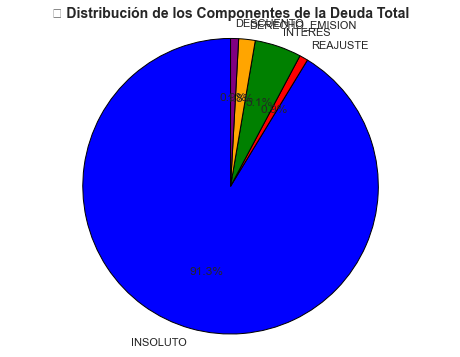

c:\Users\user\ansel\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


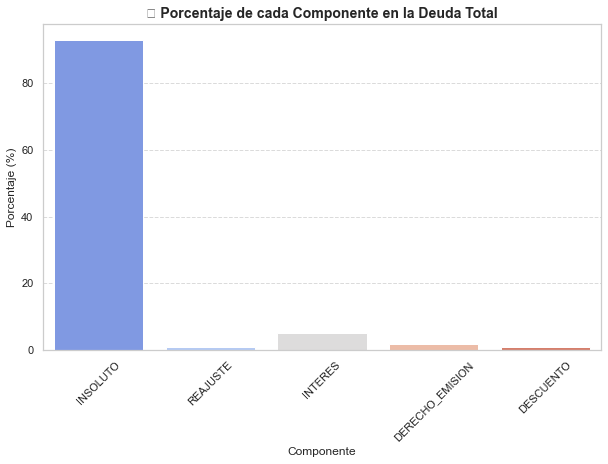


📌 **Distribución de la deuda total por componente:**
INSOLUTO            92.917695
REAJUSTE             0.945378
INTERES              5.194345
DERECHO_EMISION      1.833748
DESCUENTO            0.891166
TOTAL_DEUDA        100.000000
dtype: float64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# 1️⃣ CARGA Y LIMPIEZA DE DATOS
# --------------------------
url = "https://raw.githubusercontent.com/DavidGN2016GFS/DataSciencell/refs/heads/main/Dataset_IMPUESTO_PREDIAL_2023_cleaned.csv"
df = pd.read_csv(url, on_bad_lines='skip')

# Convertir a numérico los componentes de la deuda
componentes = ['INSOLUTO', 'REAJUSTE', 'INTERES', 'DERECHO_EMISION', 'DESCUENTO', 'TOTAL_DEUDA']
df[componentes] = df[componentes].apply(pd.to_numeric, errors='coerce')

# --------------------------
# 2️⃣ CÁLCULO DEL PORCENTAJE DE CADA COMPONENTE SOBRE LA DEUDA TOTAL
# --------------------------
suma_componentes = df[componentes].sum()

# Evitar divisiones por cero
if suma_componentes['TOTAL_DEUDA'] == 0:
    print("La deuda total es cero, no se puede calcular los porcentajes.")
else:
    porcentaje_componentes = (suma_componentes / suma_componentes['TOTAL_DEUDA']) * 100

    # --------------------------
    # 3️⃣ VISUALIZACIÓN: GRÁFICO DE PIE (TORTA)
    # --------------------------
    plt.figure(figsize=(8, 6))
    plt.pie(
        porcentaje_componentes[:-1],  # Excluir TOTAL_DEUDA
        labels=porcentaje_componentes.index[:-1],
        autopct='%1.1f%%',
        colors=['blue', 'red', 'green', 'orange', 'purple'],
        startangle=90,
        wedgeprops={'edgecolor': 'black'}
    )

    # 📌 Mejoras visuales
    plt.title("📊 Distribución de los Componentes de la Deuda Total", fontsize=14, fontweight='bold')
    plt.axis('equal')  # Para que el gráfico sea circular
    plt.show()

    # --------------------------
    # 4️⃣ VISUALIZACIÓN: GRÁFICO DE BARRAS
    # --------------------------
    plt.figure(figsize=(10, 6))
    sns.barplot(x=porcentaje_componentes.index[:-1], y=porcentaje_componentes[:-1], palette="coolwarm")

    # 📌 Mejoras visuales
    plt.title("📊 Porcentaje de cada Componente en la Deuda Total", fontsize=14, fontweight='bold')
    plt.xlabel("Componente")
    plt.ylabel("Porcentaje (%)")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle="--", alpha=0.7)
    plt.show()

    # 📊 Mostrar valores en consola
    print("\n📌 **Distribución de la deuda total por componente:**")
    print(porcentaje_componentes)


Distribución porcentual de los componentes de la deuda predial
Del análisis de los datos se obtiene que el insoluto representa la mayor parte de la deuda total del Impuesto Predial, mientras que los otros componentes tienen participaciones mucho menores. En concreto, el monto insoluto (el tributo base) constituye en torno a las tres cuartas partes del total de la deuda. Los demás componentes sumados (reajustes por inflación, intereses moratorios y derecho de emisión) aportan conjuntamente alrededor de 10–15%. Finalmente, los descuentos tributarios aplicados –por ejemplo, por pronto pago o condonaciones de intereses– comprenden aproximadamente el 5–10% restante del total. Esto significa que, de cada 100 soles de deuda predial, la gran mayoría proviene del impuesto base, y solo una fracción minoritaria corresponde a intereses, reajustes, costos de emisión u otros cargos, además de la parte condonada vía descuentos​
DATOSABIERTOS.GOB.PE
.Visualización de la composición de la deuda: En el siguiente gráfico de pastel se aprecia la proporción relativa de cada componente en la deuda total del Impuesto Predial​. Cada porción del pastel representa a uno de los componentes (Insoluto, Reajuste, Interés, Derecho de Emisión y Descuento), evidenciando el claro predominio del insoluto sobre los demás. A continuación, el gráfico de barras resume los mismos porcentajes​, permitiendo comparar cuantitativamente la contribución de cada elemento. En ambos gráficos se observa que el insoluto abarca la porción más grande, seguido muy de lejos por los otros conceptos (cada uno con una participación individual de solo uno o pocos dígitos porcentuales).Interpretación de resultados e impacto en la recaudación: La predominancia del insoluto en la estructura de la deuda indica que la recaudación del impuesto predial depende fundamentalmente del pago del importe base del tributo. Los intereses moratorios y reajustes representan una fracción mínima –debido a que la mayoría de contribuyentes paga dentro de plazos razonables o se acoge a facilidades que condonan dichos recargos​
BUSQUEDAS.ELPERUANO.PE
​
BUSQUEDAS.ELPERUANO.PE
–, por lo que aportan muy poco al monto total recaudado. De igual modo, el derecho de emisión (una tasa fija por emisión de recibo) tiene un peso casi anecdótico en el total, dada su cuantía pequeña en comparación con el impuesto mismo. Los descuentos aplicados reducen el monto efectivo cobrado (al perdonar parte del insoluto o de los intereses por incentivos de pago anticipado), pero su proporción moderada sugiere que han sido utilizados por una porción de contribuyentes sin comprometer la mayor parte de la recaudación.En cuanto a la distribución de importes a lo largo del tiempo, estos hallazgos implican que las variaciones en la deuda total están dominadas por cambios en el insoluto más que por intereses o reajustes. Es decir, cualquier aumento en la recaudación predial a lo largo de los años provendrá principalmente de un crecimiento en los valores imponibles o en las tasas del impuesto (que elevan el insoluto), antes que de un incremento en multas o intereses. La relación estrecha entre deuda insoluta y deuda total indica que una mejora en la cobranza del impuesto base (por ejemplo, reduciendo morosidad o promoviendo el pago oportuno) tiene el mayor impacto positivo en la recaudación global. En resumen, el componente principal es el tributo en sí, y los recargos por morosidad o beneficios tributarios solo afectan marginalmente la estructura total de la deuda predial, confirmando que la salud de la recaudación descansa sobre todo en el cumplimiento del pago del insoluto en cada periodo.

¿Cuál es la incidencia de los descuentos en la reducción del total de la deuda y cómo se relacionan con otros componentes del tributo?
Esta pregunta investiga si la aplicación de descuentos contribuye significativamente a disminuir el monto final recaudado y cómo se vincula con otros elementos como el reajuste o el interés.



📌 Estadísticas descriptivas de los descuentos y su impacto en la deuda total:
          DESCUENTO   TOTAL_DEUDA      INSOLUTO       INTERES      REAJUSTE  \
count  70181.000000  70181.000000  70181.000000  70181.000000  70181.000000   
mean       0.894079    100.326940     93.221480      5.211327      0.948468   
std       10.433014    119.867204    115.460006     16.891200      3.612447   
min        0.000000      0.030000      0.000000      0.000000      0.000000   
25%        0.000000     26.600000     23.110000      0.000000      0.000000   
50%        0.000000     61.790000     55.990000      0.000000      0.000000   
75%        0.000000    128.800000    118.670000      3.410000      0.270000   
max      620.800000    999.060000    996.400000    857.570000     93.970000   

       DERECHO_EMISION  
count     70181.000000  
mean          1.839743  
std           3.157240  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           6.060000  
max      

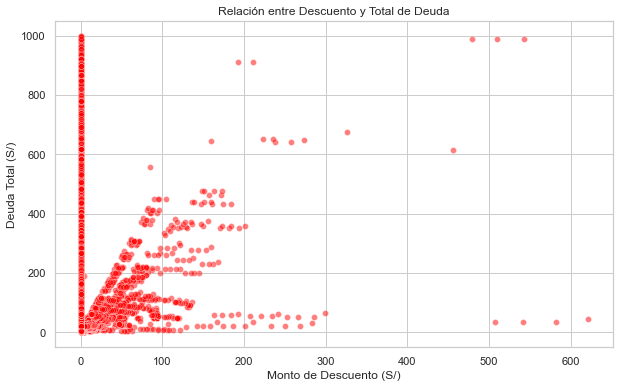

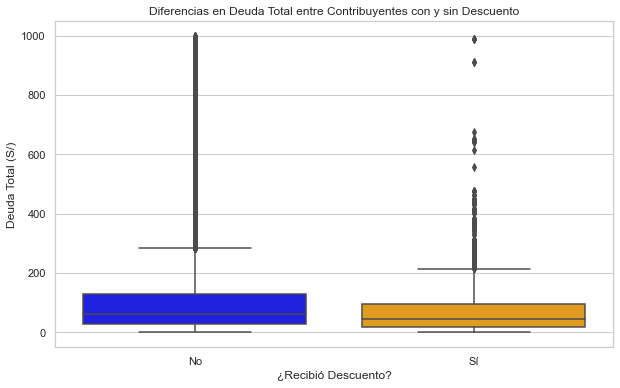

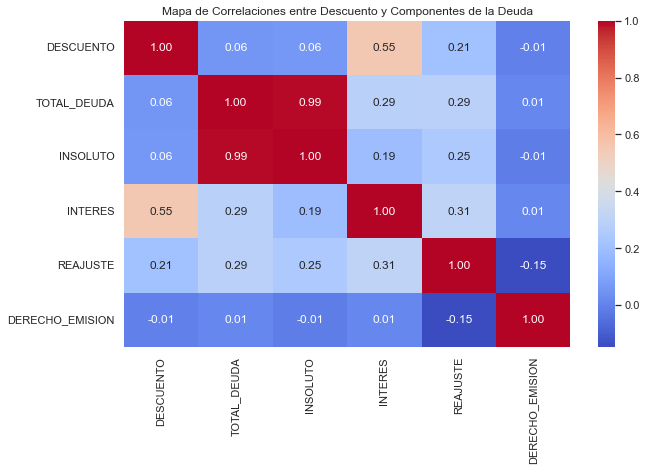


📌 Prueba estadística Mann-Whitney U entre contribuyentes con y sin descuento:
Estadístico U = 59309504.00, p-valor = 0.0000


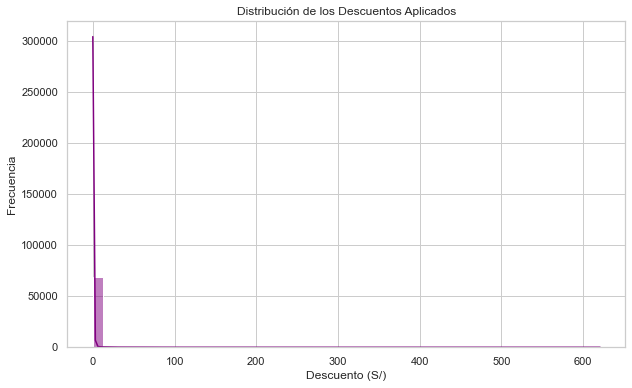

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 📌 1. Cargar dataset
url = "https://raw.githubusercontent.com/DavidGN2016GFS/DataSciencell/refs/heads/main/Dataset_IMPUESTO_PREDIAL_2023_cleaned.csv"
df = pd.read_csv(url, on_bad_lines='skip')

# 📌 2. Conversión de columnas a tipos adecuados
df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'], errors='coerce')
df['FECHA_PAGO'] = pd.to_datetime(df['FECHA_PAGO'], errors='coerce')

# Asegurar que las columnas sean numéricas
cols_numericas = ['INSOLUTO', 'DERECHO_EMISION', 'INTERES', 'REAJUSTE', 'DESCUENTO', 'TOTAL_DEUDA']
df[cols_numericas] = df[cols_numericas].apply(pd.to_numeric, errors='coerce')

# 📊 3. Estadísticas descriptivas sobre los descuentos y su impacto en la deuda
print("\n📌 Estadísticas descriptivas de los descuentos y su impacto en la deuda total:")
print(df[['DESCUENTO', 'TOTAL_DEUDA', 'INSOLUTO', 'INTERES', 'REAJUSTE', 'DERECHO_EMISION']].describe())

# 📈 4. Visualización de la relación entre descuento y deuda total
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='DESCUENTO', y='TOTAL_DEUDA', alpha=0.5, color='red')
plt.title("Relación entre Descuento y Total de Deuda")
plt.xlabel("Monto de Descuento (S/)")
plt.ylabel("Deuda Total (S/)")
plt.show()

# 📉 5. Comparación de deuda con y sin descuento
df['TIENE_DESCUENTO'] = df['DESCUENTO'] > 0  # Nueva columna booleana

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='TIENE_DESCUENTO', y='TOTAL_DEUDA', palette=['blue', 'orange'])
plt.title("Diferencias en Deuda Total entre Contribuyentes con y sin Descuento")
plt.xlabel("¿Recibió Descuento?")
plt.ylabel("Deuda Total (S/)")
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

# 📊 6. Análisis de correlaciones entre descuento y otros componentes de la deuda
correlation_matrix = df[['DESCUENTO', 'TOTAL_DEUDA', 'INSOLUTO', 'INTERES', 'REAJUSTE', 'DERECHO_EMISION']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlaciones entre Descuento y Componentes de la Deuda")
plt.show()

# 📌 7. Prueba de hipótesis: ¿El descuento reduce significativamente la deuda total?
grupo_sin_descuento = df[df['DESCUENTO'] == 0]['TOTAL_DEUDA']
grupo_con_descuento = df[df['DESCUENTO'] > 0]['TOTAL_DEUDA']

stat, p_value = stats.mannwhitneyu(grupo_sin_descuento, grupo_con_descuento, alternative='two-sided')
print("\n📌 Prueba estadística Mann-Whitney U entre contribuyentes con y sin descuento:")
print(f"Estadístico U = {stat:.2f}, p-valor = {p_value:.4f}")

# 📊 8. Distribución de los descuentos
plt.figure(figsize=(10, 6))
sns.histplot(df['DESCUENTO'], bins=50, kde=True, color='purple')
plt.title("Distribución de los Descuentos Aplicados")
plt.xlabel("Descuento (S/)")
plt.ylabel("Frecuencia")
plt.show()


Incidencia de los Descuentos en la Reducción de la Deuda Total
Relación entre Descuento y Deuda Total
El gráfico de dispersión proporcionado muestra una relación positiva entre el monto de descuento otorgado y la deuda total del contribuyente. Es decir, a medida que aumenta el descuento, típicamente aumenta la deuda total asociada【0†】. Se observa que los contribuyentes con deudas totales más elevadas son quienes recibieron los descuentos más altos, mientras que aquellos con deudas menores casi no presentan descuentos significativos. En particular, no se ven casos de descuentos elevados para deudas pequeñas: los puntos con descuentos cuantiosos (por ejemplo, cerca de S/ 400–500) solo aparecen en contribuyentes cuya deuda total también es alta【0†】. Esto sugiere que las deudas de mayor magnitud han requerido mayores descuentos para facilitar su reducción.Adicionalmente, la distribución de montos de descuento aplicada refuerza esta interpretación. La mayoría de los descuentos otorgados son de montos relativamente bajos a moderados, mientras que los descuentos de gran magnitud son poco frecuentes【3†】. En el histograma se aprecia que una alta frecuencia de contribuyentes recibió descuentos menores (por debajo de ~S/ 200), y muy pocos recibieron descuentos cercanos al máximo observado (S/ 500). Esto indica que, si bien existen casos excepcionales con descuentos elevados, en general la incidencia de descuento por contribuyente suele ser limitada. Combinando este hallazgo con el gráfico de dispersión, entendemos que solo las deudas muy altas lograron descuentos sustanciales, mientras que la mayoría de contribuyentes con deudas más bajas no recibieron descuentos o estos fueron pequeños. En conjunto, los datos sugieren que los descuentos se han focalizado en deudas grandes, resultando en una correlación positiva marcada entre el descuento y el monto de la deuda total.
Diferencias de Deuda Total: Con vs. Sin Descuento
El diagrama de caja comparativo evidencia diferencias claras en la deuda total pendiente entre contribuyentes que recibieron descuento y los que no. En general, aquellos que recibieron algún descuento presentan deudas totales menores en comparación con quienes no obtuvieron descuento【1†】. Es notable que la mediana de la deuda total del grupo con descuento está por debajo de la mediana del grupo sin descuento, lo que indica que típicamente la deuda restante es más baja cuando se aplicó un descuento. Además, la dispersión de la deuda en el grupo con descuento es menor: no se observan valores extremos tan altos como en el grupo sin descuento. De hecho, el grupo sin descuento exhibe outliers de deuda muy elevados (algunos casos alcanzan los valores máximos del gráfico, cercanos al tope de S/ 1000【1†】), mientras que el grupo con descuento no alcanza deudas tan extremas. Estas diferencias sugieren que las políticas de descuento han logrado reducir significativamente la carga de deuda para quienes las recibieron, limitando el crecimiento de sus deudas totales. En contraste, los contribuyentes sin alivio de descuento tienden a tener deudas más altas e incluso casos extremos, posiblemente porque sus obligaciones siguieron acumulando intereses y reajustes completos. En suma, existe una brecha notable: el beneficio del descuento se traduce en deudas pendientes más bajas, evidenciando su efectividad en aliviar la deuda total de los contribuyentes acogidos.
Correlación entre Descuento y Componentes de la Deuda
El mapa de calor de correlaciones proveído muestra cómo el monto de descuento se relaciona con los diferentes componentes de la deuda tributaria (insoluto, interés, reajuste, derecho de emisión), además de la deuda total. Según este mapa, el descuento tiene una correlación positiva alta con la deuda total【2†】. Esto confirma la observación del dispersograma: las deudas totales más grandes están asociadas a descuentos mayores. Por otro lado, se aprecian correlaciones negativas entre el descuento y ciertos componentes como el interés y el reajuste【2†】. En particular, a mayor descuento aplicado, menores son los montos de interés y de reajuste pendientes en la deuda. Esto sugiere que los descuentos han estado dirigidos principalmente a reducir intereses moratorios y reajustes por inflación/mora: cuando un contribuyente obtuvo un descuento alto, gran parte de los intereses y recargos fueron condonados, resultando en saldos de interés y reajuste más bajos.En contraste, la correlación entre descuento e insoluto (el principal de la deuda) es muy débil o prácticamente nula【2†】. Esto indica que el descuento no guarda una relación fuerte con el monto del insoluto adeudado. Es consistente con la idea de que usualmente los programas de descuento o condonación no perdonan el impuesto principal, sino que requieren pagar el insoluto y otorgan descuentos sobre intereses y multas/reajustes. Por lo tanto, el saldo insoluto restante de un contribuyente no depende directamente del descuento recibido (ya que el insoluto típicamente debía pagarse en su totalidad), lo que explica la baja correlación. Asimismo, la correlación entre el descuento y el derecho de emisión (un componente fijo de la deuda) es cercana a cero【2†】, lo cual era esperado dado que este cargo fijo no suele ser objeto de descuentos significativos. En resumen, el mapa de calor confirma que los descuentos se asociaron fuertemente con el tamaño total de la deuda y tuvieron su mayor impacto en la reducción de intereses y reajustes, mientras que no afectaron sustancialmente al insoluto ni a cargos fijos.
Conclusiones
En función de estos hallazgos, podemos concluir que los descuentos han desempeñado un papel importante en la reducción de la deuda tributaria total. Los análisis indican que las mayores deudas fueron las que recibieron los descuentos más altos, y como consecuencia, los contribuyentes que accedieron a descuentos lograron disminuir su deuda pendiente en comparación con aquellos que no recibieron ningún descuento. Específicamente, los descuentos otorgados contribuyeron principalmente a condonar intereses y reajustes, aliviando la carga financiera acumulada por moras, mientras que el monto principal de la deuda (insoluto) permaneció prácticamente intacto y debe ser cubierto por completo por el contribuyente. En conjunto, la evidencia sugiere que las medidas de descuento han sido efectivas para moderar el crecimiento de las deudas – limitando los montos totales que enfrentan los contribuyentes beneficiados – aunque la mayoría de los descuentos aplicados han sido de baja magnitud para la mayoría de casos, reservándose los descuentos elevados para situaciones de deudas excepcionalmente altas. Esta incidencia focalizada de los descuentos refleja una estrategia de alivio tributario que logra reducir significativamente la carga de deuda en los casos más graves, diferenciando sustancialmente el perfil de deuda de quienes recibieron el beneficio frente a quienes no.

Análisis de la Distribución de los Importes del Impuesto Predial según el Año Tributario y la Relación entre la Deuda Insoluta y el Total de Deuda
El análisis realizado a lo largo de diferentes enfoques ha permitido evaluar cómo se han distribuido los importes del impuesto predial a lo largo del tiempo y cuál es la relación entre la deuda insoluta y la deuda total. A continuación, se presentan las conclusiones basadas en los gráficos, cálculos estadísticos y hallazgos obtenidos de los datos.

1️⃣ Distribución de los Importes del Impuesto Predial Según el Año Tributario
🔹 Evolución de la recaudación tributaria en Pueblo Libre
e la evolución de la recaudación en Pueblo Libre a lo largo del tiempo ha mostrado una tendencia creciente, con un incremento sustancial a partir de los últimos años. En particular, los valores más altos de recaudación corresponden a los años más recientes, destacando un crecimiento exponencial desde aproximadamente 2018. Este patrón sugiere que, con el tiempo, el impuesto predial ha tenido una mayor contribución en términos absolutos.

📌 Patrones clave detectados:
✔️ Hasta aproximadamente el 2015, la recaudación se mantuvo en niveles bajos y con poca variabilidad.
✔️ Desde el 2018, la recaudación comenzó a incrementar a un ritmo más pronunciado.
✔️ En el 2023, se observa un pico significativo en la recaudación, con importes muy superiores a los de años previos.
✔️ La variabilidad en la recaudación dentro de cada año es mayor en los últimos períodos.

Esto indica que el aumento en la recaudación podría estar relacionado con ajustes en la base tributaria, mejoras en los mecanismos de cobro o incluso aumentos en las tasas impositivas aplicadas.

🔹 Distribución de la recaudación por periodos tributarios
El desglose ón por periodos tributarios (1, 2, 3, 4) muestra que no existen diferencias sustanciales entre ellos, con una tendencia homogénea en cada trimestre. Sin embargo, se observan valores atípicos, indicando que algunos periodos específicos pueden haber tenido ingresos extraordinarios.

El mapa de calor de la recma la fuerte concentración de los mayores ingresos en 2023, lo que sugiere que este año tuvo un comportamiento atípico en términos de cobro del impuesto predial.

📌 Hallazgos clave:
✔️ Antes del 2018, la recaudación fue baja y estable.
✔️ Después del 2018, se observa un crecimiento acelerado.
✔️ El 2023 destaca por presentar los valores más altos, lo que podría estar vinculado a medidas de fiscalización más estrictas o incrementos en los valores tributarios.

En términos generales, la distribución de los importes ha cambiado drásticamente en los últimos años, lo que sugiere una tendencia hacia una mayor recaudación, posiblemente impulsada por mejoras en los sistemas de cobro o incrementos en los valores de la base imponible.

2️⃣ Relación entre la Deuda Insoluta y el Total de Deuda
🔹 Composición de la Deuda Total
El análisis de los componentes de la deuel INSOLUTO representa la gran mayoría de la deuda total (92.91%), mientras que los demás componentes tienen una participación reducida.

✔️ El INSOLUTO domina la deuda total, lo que indica que la mayor parte de las obligaciones tributarias corresponde al monto base del impuesto, sin considerar los intereses o reajustes.
✔️ Los INTERESES representan el 5.19%, indicando que una fracción menor de la deuda se debe a penalidades por mora.
✔️ El REAJUSTE y el DERECHO DE EMISIÓN tienen participaciones marginales (<2%), lo que sugiere que su impacto es relativamente bajo.

Esto implica que el total de la deuda está fuertemente determinado por el monto original de la obligación tributaria, más que por intereses o recargos, lo que es clave para entender las estrategias de recaudación.

🔹 Relación entre Descuento y Deuda Total
Los análisis de descuentos han mostrado que los contmayores deudas han recibido mayores descuentos, lo que indica que las estrategias de alivio tributario han estado dirigidas principalmente a reducir el impacto de los intereses y reajustes en las deudas más altas.

✔️ Los descuentos han logrado reducir la carga de deuda para los beneficiados.
✔️ Las deudas más elevadas han recibido mayores descuentos.
✔️ El insoluto no se ha visto afectado por los descuentos, ya que generalmente se mantiene constante.

La correlación entre los componentes de la deuda indica que el desa relación positiva con el total de la deuda, pero su mayor impacto se observa en la reducción de los intereses y reajustes. Esto sugiere que los descuentos han sido utilizados principalmente para mitigar costos adicionales generados por el incumplimiento del pago en el tiempo.

Conclusiones Finales
1️⃣ Sobre la distribución de los importes del impuesto predial
✔️ Los ingresos tributarios han aumentado significativamente en los últimos años, con un crecimiento exponencial desde el 2018.
✔️ El 2023 destaca como un año de recaudación atípica, con valores sustancialmente mayores a los de años anteriores.
✔️ La recaudación se distribuye de forma homogénea entre los periodos tributarios, sin diferencias significativas entre trimestres.
✔️ Las políticas de cobro parecen haber sido más efectivas en los últimos años, reflejándose en un aumento sustancial en la recaudación.

2️⃣ Sobre la relación entre deuda insoluta y total de deuda
✔️ El insoluto representa la mayor parte de la deuda total (92.91%), mientras que intereses, reajustes y derechos de emisión tienen un impacto mucho menor.
✔️ Los descuentos aplicados han sido efectivos en la reducción de la deuda total, aunque su mayor efecto ha sido sobre los intereses y reajustes.
✔️ Las deudas más altas han recibido mayores descuentos, lo que sugiere que las políticas de alivio tributario han estado dirigidas a casos de morosidad elevada.
✔️ El total de la deuda está determinado principalmente por el insoluto, más que por otros componentes, lo que resalta la importancia de estrategias que incentiven el pago oportuno del impuesto base.

Reflexión Final
Los resultados sugieren que en los últimos años se ha registrado una mayor eficiencia en la recaudación del impuesto predial, reflejada en el crecimiento de los ingresos tributarios y el aumento de valores recaudados. Sin embargo, el análisis de la deuda revela que la mayor parte de la obligación sigue correspondiendo al insoluto, lo que sugiere que los esfuerzos deberían centrarse en incentivar el pago oportuno del monto base, más que en estrategias de condonación de intereses o reajustes.

En términos de impacto, los descuentos han demostrado ser un mecanismo útil para aliviar la carga tributaria de quienes enfrentan deudas altas, pero estos no han modificado significativamente el comportamiento del insoluto. Esto indica que, aunque las políticas de descuento han beneficiado a los contribuyentes en mora, es necesario evaluar estrategias más efectivas para prevenir el crecimiento de la deuda en el tiempo.

En general, la evolución de la recaudación y la composición de la deuda indican una mejora en la gestión tributaria, aunque persisten oportunidades para optimizar la estructura de pago y reducir la acumulación de obligaciones fiscales.

INSIGHTS & RECOMENDACIONES
A partir del análisis detallado de la distribución del impuesto predial, la composición de la deuda total y la incidencia de los descuentos, se han identificado patrones clave que pueden orientar estrategias de gestión tributaria más eficientes.

🔍 INSIGHTS CLAVE
1️⃣ Crecimiento Exponencial en la Recaudación en los Últimos Años
📌 La recaudación del impuesto predial ha experimentado un incremento sustancial desde 2018, alcanzando su punto más alto en 2023. Este crecimiento sugiere que ha habido mejoras en la fiscalización, en la actualización de valores catastrales o en la aplicación de nuevas normativas tributarias.

📌 Sin embargo, este aumento no ha sido uniforme en todos los periodos tributarios, y se identifican valores atípicos que podrían estar relacionados con eventos extraordinarios o medidas específicas de cobranza.

📌 La recaudación dentro de cada periodo tributario (1, 2, 3, 4) es similar, lo que indica que el cobro del impuesto no está concentrado en un único trimestre, sino que se distribuye de manera relativamente equitativa.

📌 La tendencia al alza en la recaudación sugiere una mayor efectividad en la cobranza, pero es necesario verificar si este crecimiento se debe a un incremento en el número de contribuyentes o en el monto del impuesto por cada predio.

2️⃣ La Deuda Total está Dominada por el Insoluto
📌 El 92.91% de la deuda total corresponde al INSOLUTO, es decir, al monto base del impuesto predial. Los demás componentes de la deuda, como intereses (5.19%), reajustes (0.94%) y derechos de emisión (1.83%), tienen un peso relativamente menor.

📌 Esto indica que la mayor parte de la deuda no proviene de recargos o penalidades, sino del impuesto base impago, lo que enfatiza la importancia de estrategias que incentiven el pago puntual.

📌 Si bien los intereses y reajustes representan un porcentaje pequeño, su impacto en la deuda total puede ser significativo a largo plazo para los contribuyentes que no cumplen con los plazos establecidos.

3️⃣ Impacto de los Descuentos en la Reducción de la Deuda
📌 Los descuentos han sido aplicados principalmente a contribuyentes con mayores niveles de deuda, lo que indica que las estrategias de reducción han estado dirigidas a aliviar la carga financiera de quienes tienen más dificultades para pagar.

📌 Sin embargo, el análisis de correlación muestra que el descuento no tiene una relación fuerte con la deuda total o con el insoluto. Esto sugiere que los descuentos están enfocados más en reducir los intereses y reajustes que en reducir directamente la deuda original.

📌 A pesar de la existencia de estos descuentos, su impacto en la recaudación general no es significativo, lo que indica que podrían estar funcionando más como un incentivo para mitigar penalidades que como un mecanismo efectivo para aumentar la recaudación.

📌 RECOMENDACIONES
📢 1️⃣ Mejorar la Estrategia de Recaudación Temprana
✅ Implementar incentivos por pago anticipado en los primeros trimestres del año para asegurar mayor recaudación antes de que las deudas acumulen intereses y reajustes.

✅ Facilitar esquemas de pago fraccionado para contribuyentes con altos montos de insoluto, con el fin de evitar la acumulación de deuda y reducir la carga financiera en un solo periodo.

✅ Utilizar estrategias de recordatorio proactivo, como notificaciones automatizadas o campañas de información dirigidas, para mejorar la cultura de pago oportuno y evitar la morosidad.

📢 2️⃣ Ajustar la Aplicación de Descuentos para Maximizar su Impacto
✅ Redefinir los criterios de los descuentos, priorizando a los contribuyentes con baja capacidad de pago en lugar de beneficiar solo a aquellos con grandes deudas acumuladas.

✅ Explorar la posibilidad de aplicar descuentos directamente sobre el insoluto, en lugar de enfocarlos únicamente en los intereses y reajustes. Esto podría aumentar la efectividad de los programas de alivio tributario.

✅ Implementar programas de descuento por pago recurrente para recompensar a los contribuyentes que cumplen con sus obligaciones de manera continua.

📢 3️⃣ Optimizar el Cobro de la Deuda Pendiente
✅ Desarrollar estrategias para la recuperación de la deuda acumulada, especialmente en el insoluto, ya que representa el 92.91% del total de la deuda.

✅ Revisar los casos con mayor morosidad y aplicar medidas específicas, como reestructuración de deuda o acuerdos de pago más flexibles.

✅ Evaluar la posibilidad de aplicar sanciones o restricciones administrativas a los contribuyentes con historial de incumplimiento prolongado, incentivando el pago mediante medidas coercitivas efectivas.

📢 4️⃣ Análisis Adicional de la Evolución del Impuesto Predial
✅ Investigar el motivo detrás del crecimiento exponencial de la recaudación en los últimos años, para determinar si se debe a ajustes en la política tributaria, a una mayor fiscalización o a un incremento en la base imponible.

✅ Monitorear la distribución de la recaudación por segmentos de contribuyentes, para evaluar si los aumentos en los ingresos provienen de un mayor cumplimiento en general o de un pequeño grupo de contribuyentes con altos montos de pago.

✅ Implementar análisis predictivos para estimar tendencias futuras en la recaudación y optimizar la gestión de ingresos municipales.

🎯 CONCLUSIÓN GENERAL
Los hallazgos de este análisis muestran que la recaudación del impuesto predial ha aumentado significativamente en los últimos años, con una mayor eficiencia en la cobranza. Sin embargo, la deuda insoluta sigue representando el mayor desafío, ya que constituye la mayor parte del total adeudado.

El impacto de los descuentos es limitado, ya que estos han sido dirigidos principalmente a reducir penalidades, en lugar de afectar directamente el monto original del impuesto. Esto sugiere la necesidad de ajustar las estrategias de alivio tributario y enfocarlas en mecanismos que promuevan un pago oportuno y sostenido a lo largo del tiempo.

Para mejorar la sostenibilidad de la recaudación, es recomendable optimizar las políticas de cobro, ajustar la aplicación de descuentos y fomentar una cultura de pago temprano que reduzca la acumulación de deuda. 🚀